In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs
%matplotlib inline

https://docs.scipy.org/doc/scipy/reference/tutorial/

# NumPy Polynomials

In [24]:
# Create polynomial
p = np.poly1d([3,4,5])
print p

   2
3 x + 4 x + 5


In [25]:
# Polynomial operations
print p*p
print 2*p

   4      3      2
9 x + 24 x + 46 x + 40 x + 25
   2
6 x + 8 x + 10


### Integral

In [26]:
# infinite integral, choose constant C = k, by order m)
print p.integ(m=1, k=6)

   3     2
1 x + 2 x + 5 x + 6


### Derivative

In [27]:
print p.deriv()

 
6 x + 4


### Vectorized Functions

In [28]:
def addsubtract(a,b):
    if a > b:
        return a - b
    else:
        return a + b

In [29]:
vec_addsubtract = np.vectorize(addsubtract)
vec_addsubtract([0,3,6,9],[1,3,5,7])

array([1, 6, 1, 2])

Note that vectorized functions use pair-wise operations

# Normal Distributions
Normal Distributions takes 2 parameters:mean and standard deviation. Random variable: k

### Random Variables

In [30]:
norm_dist = scs.norm
print 'lower-bound: %s, upper-bound: %s' % (norm_dist.a, norm_dist.b)

lower-bound: -inf, upper-bound: inf


### Common Methods

In [31]:
norm_dist = scs.norm

- rvs: Random Variates
- pdf: Probability Density Function
- cdf: Cumulative Distribution Function
- sf: Survival Function (1-cdf) (?)
- ppf: Percent Point (inverse cdf)
- isf: Inverse Survival Function ()
- stats: retun mean, variance, skew, kurtosis (of standard/theoretical distribution, not sampling data)
- moment: non-central moments of the distribution

In [32]:
# CDF value at 0: half the bell curve; at infinity: full bell curve
print norm_dist.cdf(0)
print norm_dist.cdf(99999999)

0.5
1.0


In [33]:
# To computer cdf at several points, we ca pass a list of a np array
print norm_dist.cdf(np.array([-1, 0, 1]))

[ 0.15865525  0.5         0.84134475]


Note that the basic methods such as pdf, cdf, etc. are vectorized functions

In [34]:
# mean, standard deviation, variance
print norm_dist.mean(), norm_dist.std(), norm_dist.var()

0.0 1.0 1.0


In [35]:
# View the moments (mean and variance in this case) of the distribution
print norm_dist.stats(moments = 'mv')

(array(0.0), array(1.0))


In [36]:
# Find the median
print norm_dist.median()

# Or find median using ppf
print norm_dist.ppf(0.5)

0.0
0.0


In [37]:
# ppf is used to find z-score
print norm_dist.ppf(0.025), norm_dist.ppf(0.975)

-1.95996398454 1.95996398454


In [38]:
# Generate random variables
norm_dist.rvs(size=3)

array([ 0.84825318,  0.50763335, -2.18693409])

In [39]:
# To generate reproducible rv, use seed
norm_dist.rvs(size=5, random_state=1234)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873])

### Shifting and Scaling

In [40]:
# To generate normal distribution with mean=3, std=2
new_norm_dist = scs.norm(loc=3, scale=2)
print new_norm_dist.stats(moments='mv')

(array(3.0), array(4.0))


In [41]:
# Trying out the similar methods
print new_norm_dist.mean(), new_norm_dist.var(), new_norm_dist.median()

print new_norm_dist.ppf(0.025) # this doesn't scale z-score, instead use:
print (new_norm_dist.ppf(0.025)-new_norm_dist.mean())/new_norm_dist.std()


3.0 4.0 3.0
-0.91992796908
-1.95996398454


In [42]:
# 2 ways to find mean
print norm_dist.mean()
print norm_dist.stats(moments='m')

0.0
0.0


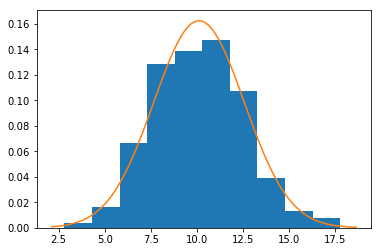

In [45]:
# Generate some data (mean=10, var=2.5)
n_data = scs.norm.rvs(10, 2.5, size=500)

# Plot data histogram and normalize it
plt.hist(n_data, normed=True)

# Get the mean and std from the generatd data
mu = n_data.mean()
std = n_data.std()

# Plot the PDF (using sample mean and std)
x = np.linspace(data.min(), data.max(), 100)
p = scs.norm.pdf(x, mu, std)
plt.plot(x, p)

In [46]:
# Fit the data to a normal distribution
mu, std = scs.norm.fit(data)
print mu, std

10.1416138613 2.4679141426


Note: We can also generate normal distribution sample directly using NumPy

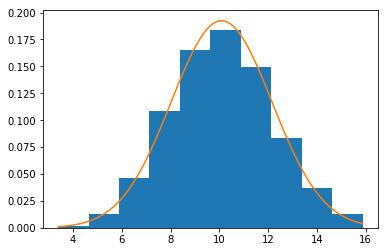

In [47]:
# We can generate random normal sample from NumPy
np_data = np.random.normal(loc=10, scale=2, size =500)

# Histogram of data
plt.hist(np_data, normed=True)

# Plot PDF
x = np.linspace(np_data.min(), np_data.max(),100)
p = scs.norm.pdf(x, np_data.mean(), np_data.std())
plt.plot(x, p)

# Poisson Distribution
Poisson distributions takes 1 parameter using lambda (SciPy calls it mu). Random variable: x (number of times an event occurs)

$$P(X=k)=\frac{\lambda^xexp(-\lambda)}{k!}$$

In [48]:
def plot_poisson(mu):
    k = np.arange(scs.poisson.ppf(0.01, mu), scs.poisson.ppf(0.99, mu), 0.01)
    p = scs.poisson.pmf(k, mu)
    plt.plot(k, p, linewidth=2)

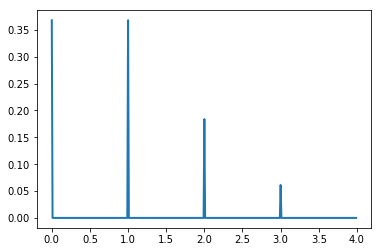

In [49]:
plot_poisson(1)

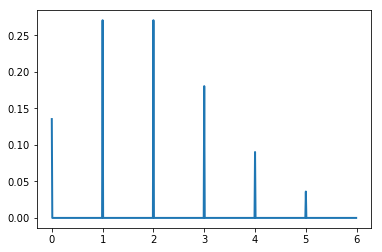

In [50]:
plot_poisson(2)

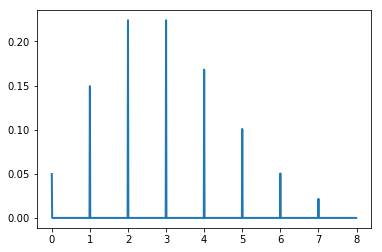

In [51]:
plot_poisson(3)

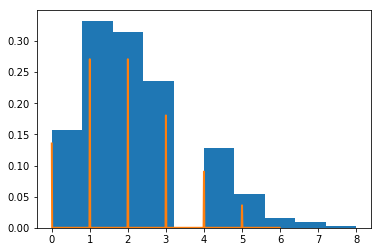

In [52]:
# Generate poisson sample data
data = scs.poisson.rvs(mu = 2, size=500)

# Histogram of sample data
plt.hist(data, normed=True)

# Plot Poisson PMF for lambda(mu) = 2
plot_poisson(2)

# Binomial Distribution
Bionimal distribution takes 3 parameters n and p. Random variable: x (number of successes in n trials)
$$P = \binom{n}{x}p^x(1-p)^{n-x} $$

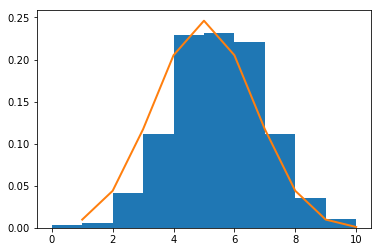

In [53]:
# Generate sample for binomial distribution
bn_data = scs.binom.rvs(n=10, p=0.5, size=1000)

# Histogram of data
plt.hist(bn_data, bins=10, normed=True)

# Plot PMF of binomial distribution
x = np.arange(1,11)
p = scs.binom.pmf(x, n=10, p=0.5)
plt.plot(x, p, linewidth=2)

In [54]:
# Get moments from binomial distribution
mean, var, skew, kurt = scs.binom.stats(n=10, p=0.5, moments='mvsk')
print mean, var, skew, kurt

# Get moments from sample
print bn_data.mean(), bn_data.var(), bn_data.std()

5.0 2.5 0.0 -0.2
4.974 2.365324 1.5379609878


# Gamma Distribution
$$P(X=x) = \cfrac{x^{a-1}e^{-x}}{\Gamma(a)}$$

Takes 2 parameters
- $\alpha$ and $\beta$, or
- $k$ and $\theta$ ($k=\alpha$ and $\theta=\cfrac{1}{\beta}$)

$Mean = \cfrac{\hat{\alpha}}{\hat{\beta}}$
where $\alpha =\cfrac{\bar{x}^2}{s^2}$ and $\beta = \cfrac{\bar{x}}{s^2}$

In SciPy, we use $k = a$, $\theta = 1$

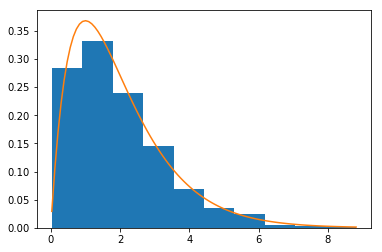

In [55]:
# Generate a sample of gamma distribution
g_data = scs.gamma.rvs(a=1.99, size=1000)

# Histogram of data
plt.hist(g_data, normed=True)

# Plot gamma curve for data
x = np.linspace(g_data.min(), g_data.max(),100)
p = scs.gamma.pdf(x, a=2)
plt.plot(x, p)

In [56]:
# Fit data into gamma distribution. Returns shape, loc, scale
print scs.gamma.fit(g_data)

(1.8743471400793208, -0.0012896559438358417, 1.0341149308838107)


# Beta Distribution
$$P(X=x) = \cfrac{\Gamma(a+b)x^{a-1}(1-x)^{b-1}}{\Gamma(a) \Gamma(b)}$$

Takes 2 parameters $\alpha$ and $\beta$

In Scipy:
* $a = \alpha$
* $b = \beta$ 

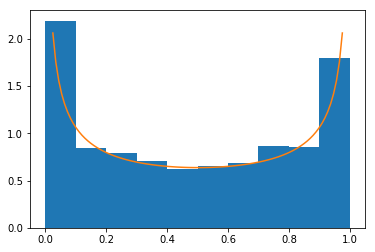

In [57]:
# Sampling from Beta Distribution
beta_data = scs.beta.rvs(a=0.5, b=0.5, size=1000)

# Histogram of data
plt.hist(beta_data, normed=True)

# Plot beta pdf. Note that the pdf curve goes to infinity, so the line below for x values will shoots up to infinity
# x = np.linspace(beta_data.min(), beta_data.max(), 100)
x = np.linspace(scs.beta(0.5,0.5).ppf(0.1), scs.beta(0.5,0.5).ppf(0.9), 100)
p = scs.beta.pdf(x, a=0.5, b=0.5)
plt.plot(x, p)


In [59]:
# Fitting data (can also input wanted parameters). Returns a, b, ?, ?
print scs.beta.fit(beta_data)

 (0.85382589755927862, 0.95336557086116369, 3.5282676259451282e-06, 1.0021192088147635)


# Bernoulli Distribution
Discrete random variable, takes in 1 paramenter p.

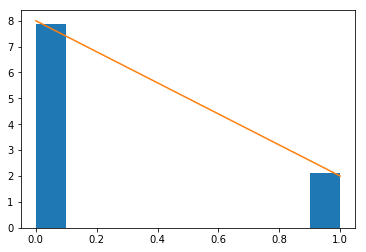

In [60]:
# Sampling from Bernoulli distribution with p = 0.2. This data include only 0's and 1's
ber_data = scs.bernoulli.rvs(p=0.2, size=1000)

# Histogram of data
plt.hist(ber_data, normed=True)

# Plot theoretical Bernoulli for p=0.2
x = [0,1]
p = scs.bernoulli.pmf(x, p=0.2)
plt.plot(x, p*10)

# Geometric Distribution
The geometric distribution models the number of trials that must be run in order to achieve success. Takes 1 parameter p.

$$f(k)=(1-p)^{k-1}p$$


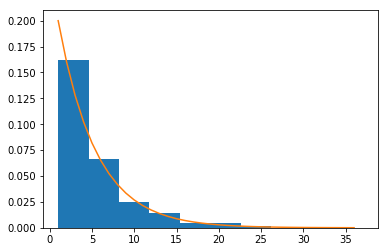

In [98]:
# Sample a geometric distribution with p=0.2
geo_data = scs.geom.rvs(p=0.2, size=1000)

# Histogram of data
plt.hist(geo_data, normed=True)

# Plot the geometric curve
x = np.arange(np.floor(geo_data.min()), np.floor(geo_data.max()))
p = scs.geom.pmf(x, p=0.2)
plt.plot(x, p)

**Note**: when use PMF, only integer values get the probability values, so to graph the curve, use floor function to get down to integers (or cast with "int") and use arange. Linspace will give decimal numbers and will get probabily = 0.

Geometric distribution doesn't have fit method ???

# Uniform Distribution

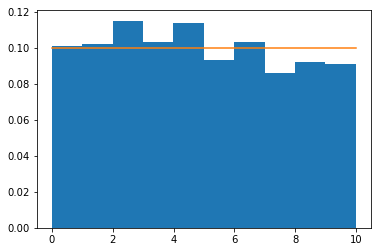

In [63]:
u_data = scs.uniform.rvs(scale=10, size=1000)

# Histogram of data
plt.hist(u_data, normed=True)

# Plot uniform
x = np.arange(0,11)
p = scs.uniform.pdf(x, scale=10)
plt.plot(x, p)

In [64]:
# Fit data to uniform distribution (returns: min, max?)
scs.uniform.fit(u_data)

(9.7439371979977582e-05, 9.9884425597874849)